<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/%5B20241125%5D%20Hybrid%20LR-Bi-LSTM%20for%204%20class%20classifications%20on%20CICIDS2017_Friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Hybrid LR-Bi-LSTM for 10 class classifications based on UNSW-NB15 dataset**

In [6]:
!pip install numpy pandas scikit-learn

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout, Flatten
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.utils import to_categorical

In [8]:
# Load dataset
dataset = pd.read_csv("Dataset_CICIDS2017_Friday.csv")

# Preprocessing: Handle missing values (if any)
dataset = dataset.dropna() # Remove missing values
#X = dataset.drop(['Class'], axis=1)
#y = dataset['Class']

### **Data Preprocessing**

In [9]:
# Encode non-numeric columns (if any)
for column in dataset.columns:
    if dataset[column].dtype == 'object':  # Identify categorical columns
        dataset[column] = LabelEncoder().fit_transform(dataset[column])

# Separate features (X) and target (y)
X = dataset.drop(['Class'], axis=1)  # Assuming 'Class' is the target column
y = dataset['Class']

In [10]:
print("Original Class Distribution:", np.bincount(y))

Original Class Distribution: [414275   1966 128027 158930]


In [11]:
# Separate features (X) and target (y)
X = dataset.drop(['Class'], axis=1)  # Assuming 'Class' is the target column
y = dataset['Class']

In [12]:
# Replace infinite and large values with finite values before scaling
X = X.replace([np.inf, -np.inf], np.nan) # Replace inf with NaN
# Fill NaN values with a large finite number or the mean/median of the column
X = X.fillna(X.mean())  # Alternatively, use X.median() or a large finite number

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
!pip install matplotlib-venn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.1-py3-none-any.whl size=45289 sha256=8557703162f57c8f223e83369d319fcd211d7ef871efb3b1b8a38baa899a176b
  Stored in directory: /root/.cache/pip/wheels/3c/b6/e2/5fadaf4aa63fac5b079d4f633e9d96b29a67ee4fae816806f3
Successfully built matplotlib-venn


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 77.2 MB/s eta 0:00:00


In [ ]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.1 MB/s eta 0:00:00


In [13]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the data
#smote = SMOTE(random_state=42)
#X_balanced, y_balanced = smote.fit_resample(X, y)

# Balance dataset using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Verify the balanced dataset distribution
print("Balanced Class Distribution:", np.bincount(y))
#print("Balanced Class Distribution:", np.bincount(y_balanced))

Balanced Class Distribution: [414275 414275 414275 414275]


In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### **Hybrid combination of LR-Bi-LSTM for 10 class classifications on UNSW-NB15**

LR model Standalone

In [ ]:
# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=800, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#print("\nConfusion Matrix:")
#print(confusion_matrix(y_test, y_pred))

Hybrid model with using features results from LR model as Bi-LSTM input

In [15]:
from keras.utils import to_categorical

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)
lr_model.fit(X_train, y_train)

# Extract probabilities from LR model
train_lr_features = lr_model.predict_proba(X_train)  # Features for Bi-LSTM from training data
test_lr_features = lr_model.predict_proba(X_test)    # Features for Bi-LSTM from test data

# Reshape LR features for Bi-LSTM input
train_lr_features = np.expand_dims(train_lr_features, axis=1)
test_lr_features = np.expand_dims(test_lr_features, axis=1)

# Convert labels to one-hot encoding for Bi-LSTM
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [16]:
## Build the Bi-LSTM model

#bilstm_model = Sequential()
#bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(1, train_lr_features.shape[2])))
#bilstm_model.add(Dropout(0.5))
#bilstm_model.add(Bidirectional(LSTM(32)))
#bilstm_model.add(Dropout(0.5))
#bilstm_model.add(Dense(10, activation='softmax'))  # 10 classes

#bilstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.regularizers import l2

bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.0001)), input_shape=(1, train_lr_features.shape[2])))
bilstm_model.add(Dropout(0.2))
bilstm_model.add(Bidirectional(LSTM(32, kernel_regularizer=l2(0.0001))))
bilstm_model.add(Dropout(0.2))
#bilstm_model.add(Bidirectional(LSTM(16, kernel_regularizer=l2(0.002))))
#bilstm_model.add(Dropout(0.2))
bilstm_model.add(Dense(4, activation='softmax', kernel_regularizer=l2(0.0001)))

bilstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Bi-LSTM model
history = bilstm_model.fit(train_lr_features, y_train, validation_split=0.2, epochs=15, batch_size=64, verbose=1)

# Evaluate the hybrid model on the test set
test_predictions = bilstm_model.predict(test_lr_features)
test_predictions_labels = np.argmax(test_predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Performance metrics
accuracy = accuracy_score(true_labels, test_predictions_labels)
print("\nHybrid Model Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(true_labels, test_predictions_labels))
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels, test_predictions_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
16571/16571 ━━━━━━━━━━━━━━━━━━━━ 122s 7ms/step - accuracy: 0.9982 - loss: 0.0549 - val_accuracy: 0.9999 - val_loss: 0.0054
Epoch 2/15
16571/16571 ━━━━━━━━━━━━━━━━━━━━ 141s 7ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.9999 - val_loss: 0.0053
Epoch 3/15
16571/16571 ━━━━━━━━━━━━━━━━━━━━ 138s 7ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.9999 - val_loss: 0.0052
Epoch 4/15
16571/16571 ━━━━━━━━━━━━━━━━━━━━ 108s 7ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 0.9999 - val_loss: 0.0052
Epoch 5/15
16571/16571 ━━━━━━━━━━━━━━━━━━━━ 144s 7ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.9999 - val_loss: 0.0053
Epoch 6/15
16571/16571 ━━━━━━━━━━━━━━━━━━━━ 141s 7ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.9999 - val_loss: 0.0052
Epoch 7/15
16571/16571 ━━━━━━━━━━━━━━━━━━━━ 112s 7ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.9999 - val_loss: 0.0052
Epoch 8/15
16571/16571 ━━━━━━━━━━━━━━━━━━━━ 139s 7ms/step - ac

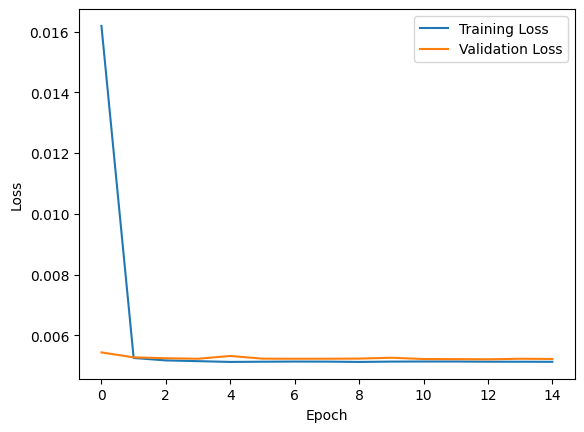

In [17]:
# Plot training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# Performance metrics
accuracy = accuracy_score(true_labels, test_predictions_labels)
precision = precision_score(true_labels, test_predictions_labels, average='macro')
recall = recall_score(true_labels, test_predictions_labels, average='macro')
f1 = f1_score(true_labels, test_predictions_labels, average='macro')

print("\nHybrid Model Accuracy:", accuracy)
print("\nPrecision:", precision)
print("\nRecall:", recall)
print("\nF1-Score:", f1)


Hybrid Model Accuracy: 0.9999728441252791

Precision: 0.9999728470747249

Recall: 0.9999728441252791

F1-Score: 0.9999728441251989


In [19]:
# Classification report
print("\nClassification Report:")
print(classification_report(true_labels, test_predictions_labels))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82855
           1       1.00      1.00      1.00     82855
           2       1.00      1.00      1.00     82855
           3       1.00      1.00      1.00     82855

    accuracy                           1.00    331420
   macro avg       1.00      1.00      1.00    331420
weighted avg       1.00      1.00      1.00    331420



In [21]:
# Detection Rate (Recall for each class)
detection_rate = recall_score(true_labels, test_predictions_labels, average=None)
for i in range(len(detection_rate)):
    print(f"Detection Rate for Class {i}: {detection_rate[i]:.10f}")

Detection Rate for Class 0: 1.0000000000
Detection Rate for Class 1: 1.0000000000
Detection Rate for Class 2: 0.9998913765
Detection Rate for Class 3: 1.0000000000


**With FGSM adversarial training**

In [ ]:
import tensorflow as tf
from keras.regularizers import l2

#Build the Bi-LSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.001)), input_shape=(1, train_lr_features.shape[2])))
bilstm_model.add(Dropout(0.5))
bilstm_model.add(Bidirectional(LSTM(32, kernel_regularizer=l2(0.001))))
bilstm_model.add(Dropout(0.5))
#bilstm_model.add(Bidirectional(LSTM(16, kernel_regularizer=l2(0.002))))
#bilstm_model.add(Dropout(0.2))
bilstm_model.add(Dense(10, activation='softmax', kernel_regularizer=l2(0.001)))

bilstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# FGSM: Function to generate adversarial examples
def generate_adversarial_examples(model, data, labels, epsilon=0.1):
    data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)
    labels_tensor = tf.convert_to_tensor(labels, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(data_tensor)
        predictions = model(data_tensor)
        loss = tf.keras.losses.categorical_crossentropy(labels_tensor, predictions)

    gradients = tape.gradient(loss, data_tensor)
    perturbations = epsilon * tf.sign(gradients)
    adversarial_data = data_tensor + perturbations

    return adversarial_data.numpy()

# Generate adversarial examples for training
adversarial_train_features = generate_adversarial_examples(bilstm_model, train_lr_features, y_train)

# Combine original and adversarial examples
combined_train_features = np.concatenate((train_lr_features, adversarial_train_features), axis=0)
combined_train_labels = np.concatenate((y_train, y_train), axis=0)

# Train the Bi-LSTM model
history = bilstm_model.fit(
    combined_train_features, combined_train_labels,
    validation_split=0.2,
    epochs=15,
    batch_size=64,
    verbose=1
)

# Evaluate the model
test_predictions = bilstm_model.predict(test_lr_features)
test_predictions_labels = np.argmax(test_predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Metrics and results
accuracy = accuracy_score(true_labels, test_predictions_labels)
print("\nHybrid Model Accuracy with FGSM:", accuracy)
print("\nClassification Report:")
print(classification_report(true_labels, test_predictions_labels))
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels, test_predictions_labels))

Epoch 1/15
18600/18600 [==============================] - 91s 5ms/step - loss: 0.1807 - accuracy: 0.9988 - val_loss: 0.1139 - val_accuracy: 0.9998
Epoch 2/15
18600/18600 [==============================] - 80s 4ms/step - loss: 0.1241 - accuracy: 0.9999 - val_loss: 0.1114 - val_accuracy: 0.9998
Epoch 3/15
18600/18600 [==============================] - 83s 4ms/step - loss: 0.1225 - accuracy: 0.9999 - val_loss: 0.1112 - val_accuracy: 0.9998
Epoch 4/15
18600/18600 [==============================] - 84s 5ms/step - loss: 0.1224 - accuracy: 0.9999 - val_loss: 0.1108 - val_accuracy: 0.9998
Epoch 5/15
18600/18600 [==============================] - 84s 5ms/step - loss: 0.1223 - accuracy: 0.9999 - val_loss: 0.1109 - val_accuracy: 0.9998
Epoch 6/15
18600/18600 [==============================] - 80s 4ms/step - loss: 0.1223 - accuracy: 0.9999 - val_loss: 0.1111 - val_accuracy: 0.9998
Epoch 7/15
18600/18600 [==============================] - 80s 4ms/step - loss: 0.1223 - accuracy: 0.9999 - val_loss: 0

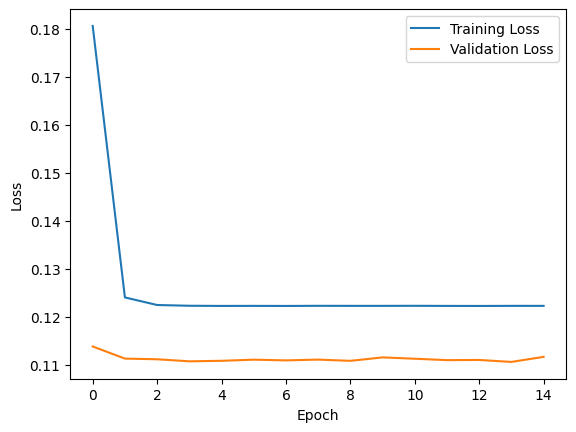

In [ ]:
# Plot training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# Performance metrics
accuracy = accuracy_score(true_labels, test_predictions_labels)
precision = precision_score(true_labels, test_predictions_labels, average='macro')
recall = recall_score(true_labels, test_predictions_labels, average='macro')
f1 = f1_score(true_labels, test_predictions_labels, average='macro')

print("\nHybrid Model Accuracy:", accuracy)
print("\nPrecision:", precision)
print("\nRecall:", recall)
print("\nF1-Score:", f1)


Hybrid Model Accuracy: 0.9997741935483871

Precision: 0.9997744617690524

Recall: 0.9997741935483871

F1-Score: 0.9997741699732392


In [ ]:
# Detection Rate (Recall for each class)
detection_rate = recall_score(true_labels, test_predictions_labels, average=None)
for i in range(len(detection_rate)):
    print(f"Detection Rate for Class {i}: {detection_rate[i]:.10f}")

Detection Rate for Class 0: 1.0000000000
Detection Rate for Class 1: 1.0000000000
Detection Rate for Class 2: 1.0000000000
Detection Rate for Class 3: 1.0000000000
Detection Rate for Class 4: 1.0000000000
Detection Rate for Class 5: 0.9999462366
Detection Rate for Class 6: 0.9979569892
Detection Rate for Class 7: 0.9998387097
Detection Rate for Class 8: 1.0000000000
Detection Rate for Class 9: 1.0000000000
